In [1]:
#Importing header files
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Sample_Size
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  


In [5]:
#Reading file
path = "/Users/rahulkosamkar/Documents/Data_Science/Projects/Inferential_stats_and_linear_Regression /Banking_Inference/banking_inference.csv"
data=pd.read_csv(path)
data.head(5)


,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [6]:
#Code starts here

#Task 1: Confidence Interval

#Sampling the dataframe
data_sample = data.sample(n=sample_size, random_state=0)


#Finding the mean of the sample
sample_mean = data_sample['installment'].mean()

#Finding the standard deviation of the sample
population_std = data['installment'].std()


#Finding the margin of error
margin_of_error = z_critical * (population_std/math.sqrt(sample_size))

#Finding the confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

#Finding the true mean
true_mean=data['installment'].mean()

print(("True mean: {}".format(true_mean)))



Confidence interval:
(309.9948731652061, 325.2270568347938)
True mean: 319.08941323867265


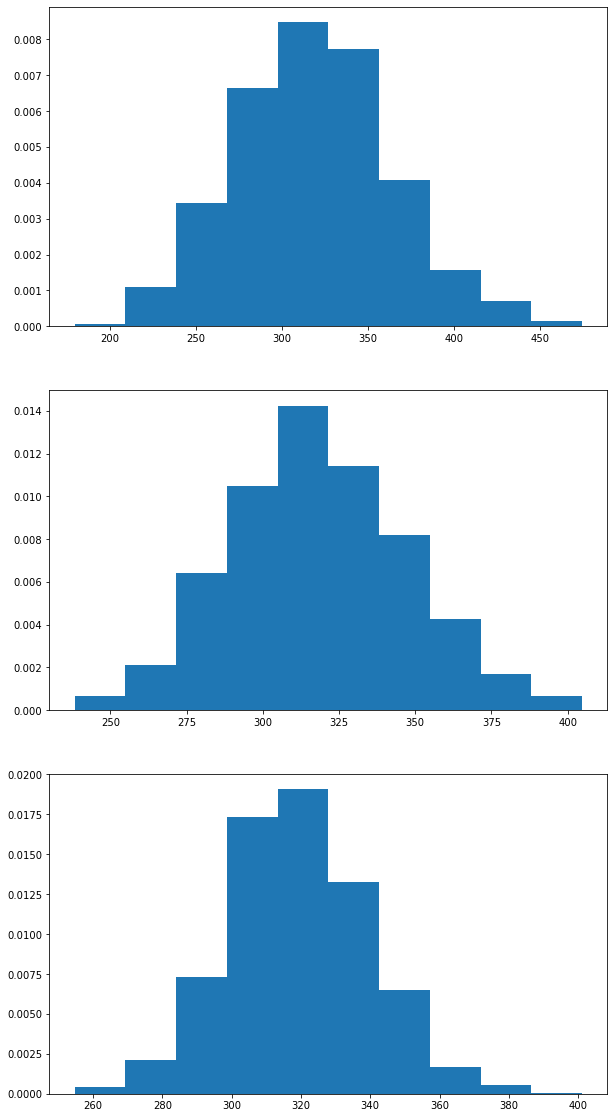

In [7]:
#Task 2:CLT

#Different sample sizes to take
sample_size=np.array([20,50,100])

#Code starts here

#Creating different subplots
fig,axes=plt.subplots(3,1, figsize=(10,20))

#Running loop to iterate through rows
for i in range(len(sample_size)):
    
    #Initialising a list
    m=[]
    
    #Loop to implement the no. of samples
    for j in range(1000):
        
        #Finding mean of a random sample
        mean=data['installment'].sample(sample_size[i]).mean()
        
        #Appending the mean to the list
        m.append(mean)
        
        
    #Converting the list to series
    mean_series=pd.Series(m)   

    #Plotting the histogram for the series
    axes[i].hist(mean_series, density=True)

    

#Displaying the plot
plt.show()



In [8]:
#Task 3: Small Business Interests


#Code starts here

# Removing the last character from the values in column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
data['int.rate']=data['int.rate'].astype(float)/100



#Applying ztest for the hypothesis
z_statistic_1, p_value_1 = ztest(x1=data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

print(('Z-statistic 1 is :{}'.format(z_statistic_1)))
print(('P-value 1 is :{}'.format(p_value_1)))


Z-statistic 1 is :12.321276240201554
P-value 1 is :3.479213190639132e-35


In [9]:
#Task 4: Installment vs Loan Defaulting


#Code starts here

#Applying ztest for the hypothesis
z_statistic_2, p_value_2 = ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic 2 is :{}'.format(z_statistic_2)))
print(('P-value 2 is :{}'.format(p_value_2)))


Z-statistic 2 is :4.894575287952092
P-value 2 is :9.85182562491764e-07


In [9]:
#Task 5: Purpose vs Loan Defaulting

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1

#Code starts here


# Subsetting the dataframe
yes=data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no=data[data['paid.back.loan']=='No']['purpose'].value_counts()


#Concating yes and no into a single dataframe
observed=pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])

print(observed)

chi2, p, dof, ex = chi2_contingency(observed)


print("Critical value")
print(critical_value)


print("Chi Statistic")
print(chi2)

                     Yes   No
debt_consolidation  3354  603
all_other           1944  387
credit_card         1116  146
home_improvement     522  107
small_business       447  172
major_purchase       388   49
educational          274   69
Critical value
12.591587243743977
Chi Statistic
96.98469589063261
